I AM USING TRANSFER LEARNING TO IMPROVE THE ACCURACY OF THE MODEL AND YOU CAN SEE IN THE SECOND TASK FOR DOWNLOADING THE DATASET

In [1]:
import torch as t
import torchvision
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import pyttsx3
import torchvision.models as models
from torch.utils.data import DataLoader,Dataset
from torch.nn import CrossEntropyLoss
from PIL import Image
from pathlib import Path
import os

In [2]:
#checking if the dataset exists
if(True):
        folder_name="animal_data"
        
        if(Path(folder_name).is_dir()):
            print(f"yeaah , the directory exists you can go on")
        else:
              print(f"No , {folder_name} does not exist ")


yeaah , the directory exists you can go on


In [3]:
#going through the directory 
image_count=0
for dirpath,dirname,files in os.walk("animal_data"):
        print(f"path : {dirpath}  || dirname : {dirpath.split("\\")[-1]} || files : {len(files)}")
        image_count+=len(files) 
print("="*80)
print(f"Image count is {image_count} images")

path : animal_data  || dirname : animal_data || files : 0
path : animal_data\Bear  || dirname : Bear || files : 125
path : animal_data\Bird  || dirname : Bird || files : 137
path : animal_data\Cat  || dirname : Cat || files : 123
path : animal_data\Cow  || dirname : Cow || files : 131
path : animal_data\Deer  || dirname : Deer || files : 127
path : animal_data\Dog  || dirname : Dog || files : 122
path : animal_data\Dolphin  || dirname : Dolphin || files : 129
path : animal_data\Elephant  || dirname : Elephant || files : 133
path : animal_data\Giraffe  || dirname : Giraffe || files : 129
path : animal_data\Horse  || dirname : Horse || files : 130
path : animal_data\Kangaroo  || dirname : Kangaroo || files : 126
path : animal_data\Lion  || dirname : Lion || files : 131
path : animal_data\Panda  || dirname : Panda || files : 135
path : animal_data\Tiger  || dirname : Tiger || files : 129
path : animal_data\Zebra  || dirname : Zebra || files : 137
Image count is 1944 images


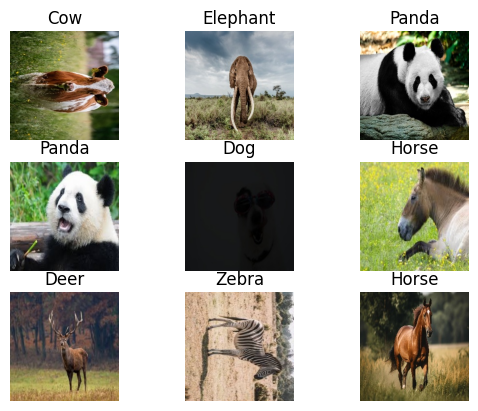

In [4]:
#showing some images 
import random
random.seed(21)
path_list=list(Path("animal_data").rglob("*.jpg"))
random_paths=random.sample(path_list,k=9)

fig,ax=plt.subplots(
        nrows=3,
        ncols=3,
        sharex=True,
        sharey=True
)
plt.axis(False)
count=0
for i in range(3):
        for j in range(3):
                ax[i,j].imshow(Image.open(random_paths[count]))
                ax[i,j].set_title(Path(random_paths[count]).parent.stem)
                ax[i,j].axis(False)
                count=count+1
plt.show()

In [5]:
#checking to prepare datasets of pytorch
print(len(path_list))
random_paths[0].stem

1646


'Cow_13_4'

In [6]:
animal_classes_list=[str(Path(i).parent.stem) for i in path_list ]
print(f" The number of paths is : {animal_classes_list.__len__()}")
print(f" The number of names  is : {path_list.__len__()}")

print(f"some paths  are \033[1;34m{path_list[:5]}\033[0m")
print(f"some names  are \033[1;34m{animal_classes_list[:5]}\033[0m")


 The number of paths is : 1646
 The number of names  is : 1646
some paths  are [WindowsPath('animal_data/Bear/bear_1.jpg'), WindowsPath('animal_data/Bear/Bear_10.jpg'), WindowsPath('animal_data/Bear/Bear_10_1.jpg'), WindowsPath('animal_data/Bear/Bear_10_2.jpg'), WindowsPath('animal_data/Bear/Bear_10_3.jpg')]
some names  are ['Bear', 'Bear', 'Bear', 'Bear', 'Bear']


In [7]:
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()
class Dataset_for_images(Dataset):
        """
        :param list1:  This is for image paths,
        :param list2:  This is for animal names
        """
        def __init__(self,list1:list,list2:list,transformation:torchvision.transforms):
                
                self.list_paths=list1.copy()
                self.list_names=list2.copy()
                self.list_names=t.tensor(encoder.fit_transform(self.list_names))
                self.transformation=transformation
        def __len__(self):
                return self.list_paths.__len__()
        def __getitem__(self, index):
                image=Image.open(self.list_paths[index])
                if self.transformation:
                        image=self.transformation(image)
                label=self.list_names[index]
                return image,label


In [8]:
manual_transforms=torchvision.transforms.Compose(
        [
                torchvision.transforms.ToTensor(),
                torchvision.transforms.ConvertImageDtype(t.float32),
                torchvision.transforms.RandomHorizontalFlip(p=0.2)
        ]
)


In [9]:
model_for_classification_weights=models.MobileNet_V2_Weights.DEFAULT
auto_transforms=model_for_classification_weights.transforms()
model_for_classification=models.mobilenet_v2(weights=model_for_classification_weights)


In [10]:
#investigating the transforms
print(f"The transformations are : \n"
      f"{auto_transforms}")

The transformations are : 
ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [11]:
total_dataset=Dataset_for_images(list1=path_list,list2=animal_classes_list,transformation=auto_transforms)

total_data_loader=DataLoader(
        batch_size=32,
        dataset=total_dataset,
        shuffle=True,
        num_workers=0,
        drop_last=True,    
)



In [12]:
for index,(images, labels) in enumerate(total_data_loader):
    print(f"\033[1;33m Batch : {index}\033[0m")
    print(images.shape)  # This will work if images is a tensor
    print(labels.shape)  # Optional, if labels are also tensors
    print("\033[1;36m=\033[0m" * 160)

 Batch : 0
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 1
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 2
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 3
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 4
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 5
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 6
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 7
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 8
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 9
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 10
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 11
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 12
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 13
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 14
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 15
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch : 16
torch.Size([32, 3, 224, 224])
torch.Size([32])
 Batch 

In [13]:
#checking the model architecture
model_for_classification

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [14]:
for param in model_for_classification.parameters():
        param.requires_grad=False

In [ ]:
model_for_classification.classifier=nn.Sequential(
        nn.Dropout(p=0.2,inplace=False),
        nn.Linear(in_features=1280,out_features=15) # 15 is classes length
)

In [16]:
from torchinfo import summary
summary(model_for_classification,input_size=(32,3,224,224),col_names=["input_size","output_size","trainable","num_params"])

Layer (type:depth-idx)                             Input Shape               Output Shape              Trainable                 Param #
MobileNetV2                                        [32, 3, 224, 224]         [32, 15]                  Partial                   --
├─Sequential: 1-1                                  [32, 3, 224, 224]         [32, 1280, 7, 7]          False                     --
│    └─Conv2dNormActivation: 2-1                   [32, 3, 224, 224]         [32, 32, 112, 112]        False                     --
│    │    └─Conv2d: 3-1                            [32, 3, 224, 224]         [32, 32, 112, 112]        False                     (864)
│    │    └─BatchNorm2d: 3-2                       [32, 32, 112, 112]        [32, 32, 112, 112]        False                     (64)
│    │    └─ReLU6: 3-3                             [32, 32, 112, 112]        [32, 32, 112, 112]        --                        --
│    └─InvertedResidual: 2-2                       [32, 32, 112, 1

In [17]:
#setting up the hyper parameters
optimizer=optim.Adam(params=model_for_classification.parameters(),lr=1e-3)
lossfn=CrossEntropyLoss()

In [19]:
results={
        "train_loss":[],
        
        "train_acc":[],
        
}

In [27]:
import pyttsx3

model_for_classification.to(t.float32)
epochs=5
for epoch in range(epochs):
        loss_total=0
        acc_total=0
        for index,(x,y) in enumerate(total_data_loader):
                x=x.to(t.float32)
                y=y.to(t.long)
                y_preds=model_for_classification(x)
                loss_accumulated=lossfn(y_preds,y)
                loss_total+=float(loss_accumulated)*32
                acc_total+=(y_preds.argmax(dim=1)==y).sum().item()
                optimizer.zero_grad()
                loss_accumulated.backward()
                optimizer.step()
        results["train_loss"].append(loss_total/len(total_data_loader.dataset))
        results["train_acc"].append(acc_total/len(total_data_loader.dataset))
        print(f"\033[1;36m{"="*160}\033[0m")
        print(f"\033[1;35m Epoch : {epoch}\033[0m")
        print(f"Training accuracy in epoch : {epoch} : {results["train_acc"][epoch]}")
        print(f"Training loss in epoch : {epoch} : {results["train_loss"][epoch]}")
        # engine=pyttsx3.init()
        # engine.say(f"Epoch {epoch} is successfly completed")
        # engine.runAndWait()
        # del engine



 Epoch : 0
Training accuracy in epoch : 0 : 0.6312272174969623
Training loss in epoch : 0 : 1.860359479271482
 Epoch : 1
Training accuracy in epoch : 1 : 0.9295261239368166
Training loss in epoch : 1 : 0.5643855021906652
 Epoch : 2
Training accuracy in epoch : 2 : 0.9520048602673147
Training loss in epoch : 2 : 0.40423475667598907
 Epoch : 3
Training accuracy in epoch : 3 : 0.959902794653706
Training loss in epoch : 3 : 0.31603321704655923
 Epoch : 4
Training accuracy in epoch : 4 : 0.9611178614823815
Training loss in epoch : 4 : 0.26299988108156375


In [28]:
#well the accuracy is over 96% it is better than previouus model so if many layers are there you can get good accuracy

In [ ]:
image_transformed=auto_transforms(Image.open(random_paths[0]))
label=random_paths[0].parent.stem


In [41]:
print(image_transformed.shape)
image_transformed=image_transformed.unsqueeze(dim=0)
print(image_transformed.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [46]:
encoded_value=int(model_for_classification(image_transformed).argmax(dim=1))

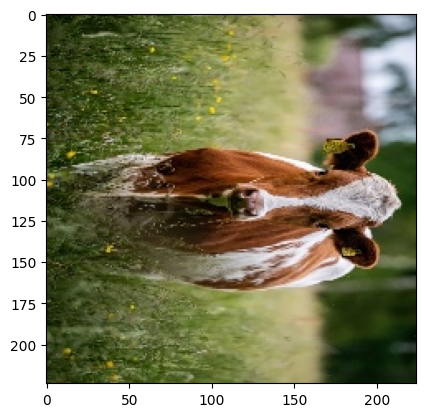

In [45]:
plt.imshow(mpimg.imread(random_paths[0]))

In [48]:
animal_list_encoded=os.listdir(Path("animal_data"))
animal_list_encoded

['Bear',
 'Bird',
 'Cat',
 'Cow',
 'Deer',
 'Dog',
 'Dolphin',
 'Elephant',
 'Giraffe',
 'Horse',
 'Kangaroo',
 'Lion',
 'Panda',
 'Tiger',
 'Zebra']

In [49]:
print(animal_list_encoded[encoded_value])

Cow


In [ ]:
#we got the correct one